# Arbres binaires

Marc Lorenzi - 18 avril 2018

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import random, sys, timeit
from math import log

## 1. Notion d'arbre binaire

### 1.1 C'est quoi ?

Un arbre binaire est une structure de données qui est soit `None`, soit un triplet $t=(x, t_1, t_2)$ où $x$ est un objet et $t_1$ et $t_2$ sont des arbres.

- $x$ est la racine de $t$
- $t_1$ est le fils gauche de $t$
- $t_2$ est le fils droit de $t$

L'arbre `None` sera appelé __l'arbre vide__.

Les fonctions ci-dessous explicitent ces définitions.

In [2]:
def racine(t): return t[0]
def gauche(t): return t[1]
def droit(t): return t[2]
def fils(t): return (gauche(t), droit(t))

def est_vide(t): return t == None

Jusqu'à ce que nous puissions faire mieux, voici un arbre que nous utiliserons pour tester nos fonctions.

In [3]:
exemple = (5, (3, (2, (0, None, (1, None, None)), None), (4, None, None)), 
(14, (6, None, (12, (8, (7, None, None), (10, (9, None, None), (11, None, None))), 
(13, None, None))), (17, (16, (15, None, None), None), (18, None, (19, None, None)))))

In [4]:
print(exemple)

(5, (3, (2, (0, None, (1, None, None)), None), (4, None, None)), (14, (6, None, (12, (8, (7, None, None), (10, (9, None, None), (11, None, None))), (13, None, None))), (17, (16, (15, None, None), None), (18, None, (19, None, None)))))


Tous ces "None" sont un peu embêtants, écrivons une fonction qui affiche de façon plus claire un arbre.

### 1.3 Afficher joliment un arbre

Si les deux fils de l'arbre $t$ sont vides, affichons juste sa racine. Et si l'arbre est vide affichons une étoile. Sinon, $t=(x, t_1, t_2)$. Affichons $x(s_1, s_2)$ où $s_i$ est la représentation de $t_i$.  

In [5]:
def vers_chaine(t):
    if est_vide(t): return '*'
    else:
        x, t1, t2 = t
        if est_vide(t1) and est_vide(t2): return str(x)
        else:
            s1 = str(x) + '('
            s2 = vers_chaine(t1) + ','
            s3 = vers_chaine(t2) + ')'
            return s1 + s2 + s3

In [6]:
def print_tree(t):
    print(vers_chaine(t))

In [7]:
print_tree(exemple)

5(3(2(0(*,1),*),4),14(6(*,12(8(7,10(9,11)),13)),17(16(15,*),18(*,19))))


C'est un peu mieux mais pas encore idéal. On va faire beaucoup mieux un peu plus loin.

### 1.3 Noeuds, feuilles

__Définition (Noeud)__ : Soit $t$ un arbre. Si $t$ est vide, alors $t$ n'a pas de noeud. Sinon, $t=(x,t_1,t_2)$ où $t_1$ et $t_2$ sont des arbres. Un noeud de $t$ est alors $x$ ou un noeud de $t_1$ ou un noeud de $t_2$.

À titre d'exemple, écrivons une fonction qui calcule le nombre de noeuds d'un arbre.

In [8]:
def nombre_noeuds(t):
    if est_vide(t): return 0
    else:
        _, t1, t2 = t
        return nombre_noeuds(t1) + nombre_noeuds(t2) + 1

In [9]:
nombre_noeuds(exemple)

20

__Définition (Feuille)__ : soit $t$ un arbre. Si $t$ est vide alors $t$ n'a pas de feuille. Sinon,  $t=(x,t_1,t_2)$ où $t_1$ et $t_2$ sont des arbres. Si $t_1$ et $t_2$ sont vides alors $x$ est une feuille de $t$. Sinon, les feuilles de $t$ sont les feuilles de $t_1$ ou les feuilles de $t_2$.

In [10]:
def nombre_feuilles(t):
    if est_vide(t): return 0
    else:
        _, t1, t2 = t
        if est_vide(t1) and est_vide(t2): return 1
        else: return nombre_feuilles(t1) + nombre_feuilles(t2)

In [11]:
nombre_feuilles(exemple)

8

Quelles sont les feuilles de notre exemple ? Le plus simple est d'écrire une fonction qui renvoie la liste des feuilles d'un arbre.

In [12]:
def liste_feuilles(t):
    if est_vide(t): return []
    else:
        x, t1, t2 = t
        if est_vide(t1) and est_vide(t2): return [x]
        else: return liste_feuilles(t1) + liste_feuilles(t2)

In [13]:
liste_feuilles(exemple)

[1, 4, 7, 9, 11, 13, 15, 19]

### 1.4 Hauteur d'un arbre

__Définition (Hauteur)__ : Soit $t$ un arbre. Si $t$ est vide, sa hauteur est 0. Sinon, $t=(x,t_1,t_2)$ où $t_1$ et $t_2$ sont des arbres. La hauteur de $t$ est alors 1 + le max de la hauteur de $t_1$ et de la hauteur de $t_2$.

Ou, si on préfère : la hauteur de $t$ est la longueur du plus long chemin de sa racine à l'une de ses feuilles.

In [14]:
def hauteur(t):
    if est_vide(t): return 0
    else:
        _, t1, t2 = t
        return max([hauteur(t1), hauteur(t2)]) + 1 

In [15]:
hauteur(exemple)

7

## 2. Dessiner un arbre

Ce serait tout de même mieux d'avoir une vision graphique de nos arbres. La fonction `draw_tree` ci-dessous fait le travail. Pour dessiner un arbre :

- On dessine son fils gauche
- On dessine son fils droit
- On trace un trait de la racine au fils gauche
- On trace un trait de la racine au fils droit

Si l'arbre est vide on ne dessine rien. Mieux vaut éviter d'exécuter la fonction `draw_tree` avec des arbres qui ont, disons, plus d'un millier de noeuds, sous peine d'attendre longtemps avant de voir quelque chose s'afficher.

La fonction `draw_tree_aux` ci-dessous prend quatre paramètres :

- Un arbre $t$
- Une rectangle $rect$. Si $rect=(x_1, x_2, y_1, y_2)$, l'arbre $t$ est dessiné dans le rectangle $[x_1,x_2]\times[y_1,y_2]$.
- Un entier $dy$ : c'est la distance entre deux niveaux de l'arbre.
- Un paramètre `labels` qui est égal à True par défaut. S'il vaut True, les valeurs des noeuds sont affichées. Sinon, seul le "squelette" de l'arbre est affiché. Il n'est pas évident de positionner correctement les étiquette des noeuds. On peut faire mieux que ci-dessous mais pour garder un code simple on va se contenter de ça.

On ne va pas utiliser cette fonction directement, elle sera appelée par la fonction principale `draw_tree`.

In [16]:
def draw_tree_aux(t, rect, dy, labels):
    if est_vide(t): return
    x1, x2, y1, y2 = rect
    xm = (x1 + x2) // 2
    x, t1, t2 = t
    draw_tree_aux(t1, (x1, xm, y1, y2 - dy), dy, labels)
    draw_tree_aux(t2, (xm, x2, y1, y2 - dy), dy, labels)
    if labels: plt.text(xm + 10, y2, str(x), fontsize=10, horizontalalignment='left',verticalalignment='bottom')
    if not est_vide(t1):
        a, b = ((xm, (x1 + xm) // 2), (y2, y2 - dy))
        plt.plot(a, b, 'k', marker='s')
    if not est_vide(t2):
        c, d = ((xm, (x2 + xm) // 2), (y2, y2 - dy))
        plt.plot(c, d, 'k', marker='s')

Voici la fonction de tracé. Elle prend un arbre $t$ en paramètre. Elle initialise un rectangle sympa (en fait un carré) où tracer l'arbre. Elle calcule la distance idéale entre le tracé de deux niveaux de l'arbre. Cette distance dépend bien entendu de la hauteur de l'arbre $t$. Enfin elle appelle `draw_tree_aux`. 

In [17]:
def draw_tree(t, labels=True):
    d = 512
    pad = 20
    dy = (d - 2 * pad) / (hauteur(t))
    draw_tree_aux(t, (pad, d - pad, pad, d - pad), dy, labels)
    plt.axis([0, d, 0, d])
    plt.axis('off')
    plt.show()

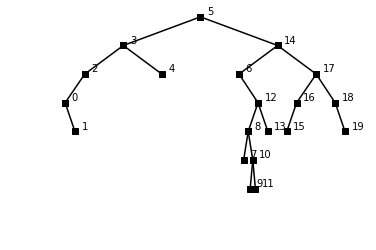

In [18]:
draw_tree(exemple, labels=True)

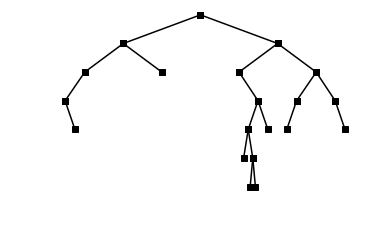

In [19]:
draw_tree(exemple, labels=False)

## 2. Arbres binaires de recherche

Supposons que les noeuds de nos arbres appartiennent à un ensemble totalement ordonné. Nous allons nous intéresser à des arbres binaires dans lesquels il est facile de retrouver un noeud. On les appelle des arbres binaires de recherche (ABR en abrégé). Ce sont les arbres vérifiant, pour chaque noeud $x$ de l'arbre, que les noeuds du fils gauche de $x$ sont inférieurs ou égaux à $x$, et les noeuds du fils droit de ce même $x$ sont strictement supérieurs à $x$. On convient également que l'arbre vide est un ABR.

Notre `exemple` est un ABR ! Quelle chance ...

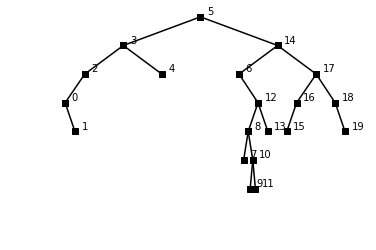

In [20]:
draw_tree(exemple)

### 2.1 Rechercher un objet dans un ABR

Il est facile de rechercher un objet dans un ABR. Si l'objet est plus petit que la racine, on recherche dans le fils gauche. Sinon ... je vous laisse deviner.

In [21]:
def rechercher(x, t):
    if est_vide(t): return False
    else:
        y, t1, t2 = t
        if x < y: return rechercher(x, t1)
        elif x > y: return rechercher(x, t2)
        else: return True

On voit facilement que le nombre de comparaisons à effectuer pour savoir si, oui ou non, un objet est dans l'arbre, est un $O(h)$ où $h$ est la hauteur de l'arbre. Si l'arbre est "équilibré" (en un sens à préciser) on peut montrer que sa hauteur est logarithmique en le nombre de noeuds. La recherche est donc très efficace. Même pour des arbres ayant des millions de noeuds, ce sera presque instantané.

En revanche, si l'arbre n'est pas équilibré on peut avoir un temps de recherche en $O(n)$ où $n$ est le nombre de noeuds de l'arbre. Dans ce cas on n'est pas contents du tout. Il existe des algorithmes permettant d'équilibrer les arbres mais nous n'en parlerons pas ici. Ci-dessous, un arbre où la fonction de recherche a un mauvais comportement.

In [22]:
def arbre_pas_equilibre_du_tout(n):
    if n == 0: return None
    else:
        t = arbre_pas_equilibre_du_tout(n - 1)
        return (n, t, None)

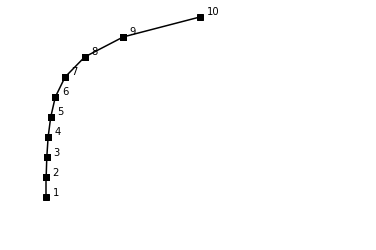

In [23]:
draw_tree(arbre_pas_equilibre_du_tout(10))

### 2.2 Et maintenant ?

Un arbre binaire de recherche peut être vu comme une structure qui permet de stocker un ensemble de données. Où cela ? Dans les noeuds, bien entendu. Nous venons de voir comment rechercher une donnée dans cet ensemble efficacement (si tout va bien). Cela dit, les ensembles de données ne sont intéressants que s'ils peuvent évoluer au cours du temps. On veut pouvoir ajouter et supprimer des éléments dans l'ensemble ! Il doit être une structure de données __dynamique__. Les trois opérations fondamentales sur une structure d'ensemble dymamique sont :

- RECHERCHER
- INSERER
- SUPPRIMER

On voit à peu près ce qu'il nous reste à faire.

### 2.3 Insérer un objet dans un ABR 

Insérer n'est pas plus difficile que rechercher :

In [24]:
def inserer(x, t):
    if est_vide(t): return (x, None, None)
    else:
        y, t1, t2 = t
        if x <= y: return (y, inserer(x, t1), t2)
        else: return (y, t1, inserer(x, t2))

La complexité de l'insertion en termes de comparaisons est la même que celle de la recherche : $O(h)$ où $h$ est la hauteur de l'arbre.

### 2.3 ABR aléatoire

Nous voici prêts à créer de façon automatique des arbres un peu plus gros que notre petit `exemple`. Voici tout d'abord une fonction `random_list`qui prend en paramètre un entier $n$ et renvoie une permutation des entiers de 0 à $n-1$. Étudiez son code, il est facile à comprendre.

On peut __montrer__ que `random_list` renvoie effectivement toute permutation de la liste $[0,\ldots,n-1]$ avec une probabilité égale à $\frac 1 {n!}$. Cette fonction mérite donc bien son nom. 

In [25]:
def random_list(n):
    s = list(range(n))
    for k in range(n):
        i = random.randint(0, k)
        s[i], s[k] = s[k], s[i]
    return s

In [26]:
random_list(10)

[8, 3, 4, 2, 7, 9, 0, 6, 1, 5]

Pour créer un ABR "aléatoire", on crée une liste aléatoire et on insère ses éléments dans un ABR initialement vide.

In [27]:
def random_abr(n):
    s = random_list(n)
    t = None
    for x in s:
        t = inserer(x, t)
    return t

In [28]:
t = random_abr(100)
print_tree(t)

41(8(5(2(1(0,*),3(*,4)),6(*,7)),14(10(9,13(12(11,*),*)),40(29(23(16(15,22(19(17(*,18),20(*,21)),*)),27(24(*,25(*,26)),28)),38(37(34(32(31(30,*),33),36(35,*)),*),39)),*))),55(45(43(42,44),50(46(*,47(*,49(48,*))),54(51(*,53(52,*)),*))),63(57(56,60(59(58,*),62(61,*))),90(70(69(65(64,67(66,68)),*),71(*,73(72,89(78(74(*,75(*,76(*,77))),88(87(85(81(79(*,80),83(82,84)),86),*),*)),*)))),95(92(91,93(*,94)),98(97(96,*),99))))))


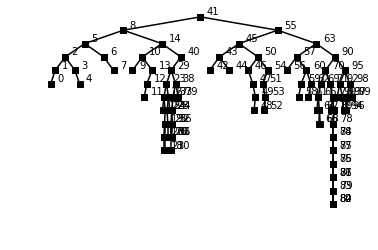

In [29]:
draw_tree(t, labels=True)

Nous pouvons (VOUS pouvez) maintenant re-tester avec des arbres un peu plus conséquents les fonctions que nous avons déjà écrites.

In [30]:
hauteur(random_abr(10000))

30

In [31]:
nombre_feuilles(random_abr(10000))

3364

Le résultat renvoyé par la fonction précédente est assez rassurant : il est connu que dans un ABR aléatoire environ $\frac 1 3$ des noeuds sont des feuilles (alors que dans un arbre aléatoire quelconque, $\frac 1 4$ environ des noeuds sont des feuilles).

### 2.4 Intermède : arbres binaires quelconques aléatoires (essai) 

Comment créer un arbre binaire aléatoire quelconque ? Intéressons nous seulement à la forme des arbres, et pas à la valeur des noeuds. Voici une idée : partant d'un arbre vide, on insère $n$ fois au hasard un noeud dans l'arbre. Comment insérer au hasard ? Eh bien on lance une pièce. Si c'est pile, on insère au hasard dans le fils gauche. Si c'est face, on insère au hasard dans le fils droit.

In [32]:
def inserer_hasard(x, t):
    if est_vide(t): return (x, None, None)
    else:
        y, t1, t2 = t
        r = random.randint(0, 1)
        if r == 0: return (y, inserer_hasard(x, t1), t2)
        else: return (y, t1, inserer_hasard(x, t2))

In [33]:
def random_tree(n):
    t = None
    for k in range(n):
        t = inserer_hasard(0, t)
    return t

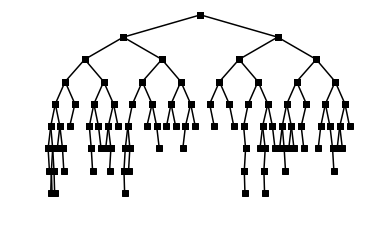

36


In [34]:
t = random_tree(100)
draw_tree(t, labels=False)
print(nombre_feuilles(t))

Certains détail nous chiffonnent. Exécutez plusieurs fois la cellule précédente : les arbres ont l'air trop équilibrés. Et puis un peu plus haut il est écrit que dans un arbre binaire à $n$ noeuds, le nombre moyen de feuilles est $\frac n 4$. C'est loin d'être ce que nous observons sur nos arbres "aléatoires". En réalité, créer un arbre vraiment aléatoire est plus subtil que cela. Nous n'irons pas plus avant dans ce notebook.

### 2.5 Minimum, maximum, d'un ABR

Le maximum d'un ABR est facile à trouver. On part de la racine et on va à droite, à droite, ... Bref c'est au fond à droite :).

In [35]:
def maximum(t):
    if est_vide(t): raise Exception('Arbre Vide')
    else:
        x, _, t2 = t
        if est_vide(t2): return x
        else: return maximum(t2)

In [36]:
maximum(random_abr(1000))

999

Pour la fonction suivante je refuse d'expliquer.

In [37]:
def minimum(t):
    if est_vide(t): raise Exception('Arbre Vide')
    else:
        x, t1, _ = t
        if est_vide(t1): return x
        else: return minimum(t1)

In [38]:
minimum(random_abr(1000))

0

### 2.6 Supprimer un noeud dans un ABR

On fait dans ce paragraphe l'hypothèse que nos ABR ont tous leurs noeuds distincts. Soit $t$ un ABR. Soit $x$ un noeud de $t$ qui a un fils droit non vide. Alors $x$ n'est pas le maximum de $t$ (cf plus haut) et possède donc un __successeur__ dans l'arbre, c'est à dire un noeud $s$ tel que $x<s$ mais pour tout noeud $y$ de l'arbre, $y \le x$ ou $s\le y$. Dit autrement, il n'y a aucun noeud de l'arbre strictement compris entre $x$ et $s$. Soit $m$ le minimum du fils droit de $x$ : montrons que $m$ est le successeur de $x$.

Pour cela, soit $y$ un noeud de l'arbre différent de $x$ et appelons $z$ le plus proche ancêtre commun de $x$ et $y$. Pour que cela soit bien clair, reprenons notre exemple.

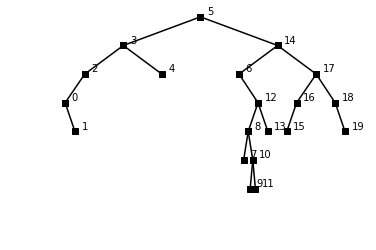

In [39]:
draw_tree(exemple)

Par exemple, le plus proche ancêtre commun de 12 et 16 est 14. Un certain nombre  de cas se présentent :

__Cas 1__ : $z=x$ et $y$ est dans le fils droit de $x$. Alors $m \le y$ par définition de $m$, minimum du fils droit.

__Cas 2__ : $z=x$ et $y$ est dans le fils gauche de $x$. Alors $y \le x$ puisque $t$ est un ABR.

__Cas 3__ : $x$ est dans le fils gauche de $z$ et $y$ est dans le fils droit de $z$. Alors $m\le y$ par définition de $m$.

__Cas 4__ : $y$ est dans le fils gauche de $z$ et $x$ est dans le fils droit de $z$. Alors $y\le z$ et $z< x$ puisque $t$ est un ABR. Donc $y<x$.

Le successeur de $x$ est donc bien $m$.

La fonction de suppression s'en déduit. On désire supprimer $x$ dans l'ABR $t$. Que peut-il arriver ? Si $x$ n'est pas la racine de $t$, on supprime $x$ dans le fils gauche ou le fils droit de $t$. Sinon :

- si $x$ n'a pas de fil droit, c'est facile, renvoyer le fils gauche de $t$.
- Si $x$ a un fils droit, soit $m$ le minimum de ce fils droit. Remplacer $x$ par $m$ et supprimer récursivement $m$ du fils droit de $x$.

On vérifie facilement que l'on conserve la structure d'ABR parce que aucun noeud de $t$ n'est compris entre $x$ et $m$.

In [40]:
def supprimer(x, t):
    if est_vide(t): return None
    else:
        y, t1, t2 = t
        if x < y: return (y, supprimer(x, t1), t2)
        elif x > y: return (y, t1, supprimer(x, t2))
        elif est_vide(t2): return t1
        else:
            m = minimum(t2)
            return (m, t1, supprimer(m, t2))
            

Testons. Je ne commente pas les résultats, vu qu'ils changent à chaque exécution. À vous de voir exactement ce qui se passe, plusieurs fois de suite.

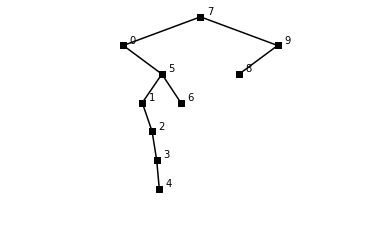

In [41]:
t = random_abr(10)
draw_tree(t)

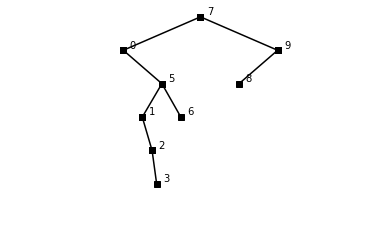

In [42]:
draw_tree(supprimer(4, t))

__Remarque__ : Soit $t$ un ABR. Soit $x$ un noeud de $t$ qui n'a pas de fils droit et qui n'est pas le maximum de $t$. Où est le successeur de $x$ ? Eh bien le successeur de $x$ est le plus proche ancêtre de $x$ dont la racine du fils gauche est aussi un ancêtre de $x$. Démonstration laissée au lecteur.

Sur notre exemple :

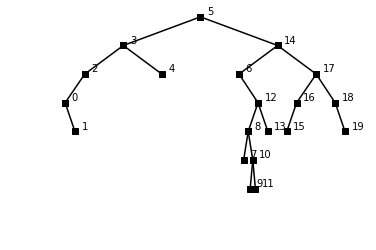

In [43]:
draw_tree(exemple)

Les ancêtres de 13 (au sens large) sont : 13, 12, 6, 14, 5. Le successeur de 13 est 14 parce que la racine du fils gauche de 14 est 6, qui est encore un ancêtre de 13. Et 14 est le plus proche ancêtre de 13 à vérifier cette propriété.

Dit autrement, on part de 13, on monte à gauche, puis à gauche, etc. Au premier virage à droite on est arrivés. Bref, c'est au fond à droite en montant.

## 3. Parcourir un arbre binaire

Parcourir un arbre, c'est explorer, visiter, tous ses noeuds. Pour quoi faire ? Tout un tas de choses. En réalité, un grand nombre des fonctions que nous avons écrites exploraient des arbres : hauteur, nombre de noeuds, affichage, etc. Il existe plusieurs façons de parcourir un arbre, dont, entre-autres :

- Le parcours niveau par niveau. Racine, puis fils de la racine, puis petits-fils, etc.
- Le parcours préfixe : on visite la racine, puis on parcourt le fils gauche, puis on parcourt le fils droit.
- Le parcours suffixe : on parcourt le fils gauche, puis on parcourt le fils droit, puis on visite la racine.
- Le parcours infixe : on parcourt le fils gauche, puis on visite la racine, puis on parcourt le fils droit.

Je ne parlerai pas ici du parcours par niveau qui nécessite d'utiliser une structure de données auxiliaire (une __file d'attente__). Le parcours par niveau est aussi appelé __parcours en largeur__. On visite les noeuds à distance 1 de la racine, puis ceux à distance 2, etc.

Ci-dessous, deux fonctions qui effectue un parcours préfixe et un parcours infixe d'un arbre $t$ en affichant ses noeuds.

In [44]:
def parcours_prefixe(t):
    if est_vide(t): return
    else:
        x, t1, t2 = t
        sys.stdout.write(str(x) + ' ')
        parcours_prefixe(t1)
        parcours_prefixe(t2)

In [45]:
parcours_prefixe(random_abr(30))

17 4 1 0 3 2 5 16 12 9 6 7 8 10 11 14 13 15 26 22 21 20 18 19 25 24 23 28 27 29 

In [46]:
def parcours_infixe(t):
    if est_vide(t): return
    else:
        x, t1, t2 = t
        parcours_infixe(t1)
        sys.stdout.write(str(x) + ' ')
        parcours_infixe(t2)

In [47]:
parcours_infixe(random_abr(30))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 

Tiens, dans le deuxième cas c'est rangé dans l'ordre. Eh oui, puisque l'arbre en paramètre est un ABR. Ce nous ouvre des perspectives insoupçonnées. Lesquelles ? Réfléchissez avant de lire la fin.

Plutôt que d'afficher, écrivons une fonction qui prend un arbre en paramètre et renvoie la liste de ses sommets visités selon un parcours infixe.

In [48]:
def arbre_vers_liste(t):
    if est_vide(t): return []
    else:
        x, t1, t2 = t
        return arbre_vers_liste(t1) + [x] + arbre_vers_liste(t2)

In [49]:
print(arbre_vers_liste(random_abr(30)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


Voici la "réciproque" de cette fonction.

In [50]:
def liste_vers_arbre(s):
    t = None
    for x in s:
        t = inserer(x, t)
    return t

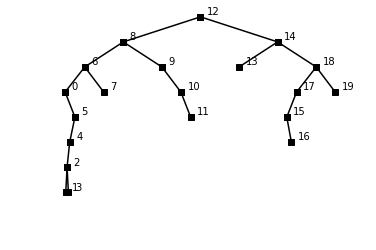

In [51]:
draw_tree(liste_vers_arbre(random_list(20)))

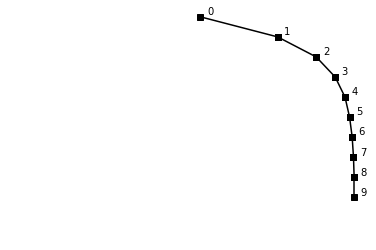

In [52]:
draw_tree(liste_vers_arbre(range(10)))

## 4. Un algorithme de tri

### 4.1 L'algorithme

Nous y voilà. Un bon article sur les structures de données se termine toujours par un algorithme de tri absolument nouveau et redoutablement efficace :-). Le voici :

In [53]:
def trier(s):
    return arbre_vers_liste(liste_vers_arbre(s))

Eh oui, on prend la liste $s$, on fabrique un ABR dont les noeuds sont ses éléments, on renvoie la liste des noeuds de l'ABR avec un parcours infixe. On a trié la liste $s$.

In [54]:
s = random_list(20)
print(s)
print(trier(s))

[1, 4, 2, 10, 7, 8, 19, 9, 5, 17, 15, 14, 6, 13, 12, 16, 11, 18, 0, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Cet algorithme est-il efficace ? Sa complexité peut être mauvaise, $O(n^2)$ en fait (où $n$ est la longueur de la liste à trier), si l'arbre créé est déséquilibré. Par exemple si, ironie du sort, la liste à trier est déjà triée (voir le dessin ci-dessus). Mais on peut montrer qu'en moyenne la complexité de cet algorithme est un $O(n\log n)$ où $n$ est le nombre d'éléments de la liste. En réalité cet algorithme n'a rien de nouveau, c'est tout simplement une variante déguisée (et pas très optimisée) de l'algorithme du tri rapide.

### 4.2 Simulations

Quel est le temps réel mis par notre algorithme pour trier une liste ?

In [55]:
%%time
s = random_list(10000)
trier(s)

CPU times: user 125 ms, sys: 1.71 ms, total: 127 ms
Wall time: 126 ms


On peut faire mieux en stockant dans une liste les temps mis pour trier des listes de tailles 10000, 20000, ..., 100000. Soyez un peu patients en exécutant les lignes ci-dessous !

In [56]:
s = []
for k in range(1, 11):
    n = 10000 * k
    t = timeit.timeit('trier(random_list(%d))' % n, setup='from __main__ import trier, random_list', number=1)
    s.append(t)

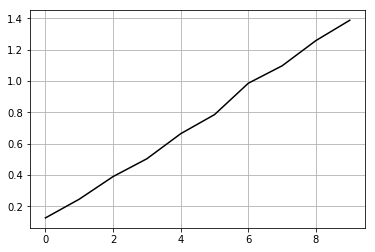

In [57]:
plt.plot(s, 'k-')
plt.grid()
plt.show()

Graphique pas très parlant, mais la théorie nous dit que si $T(n)$ est le temps moyen mis pour trier une liste de taille $n$, alors $T(n)\sim C n\ln n$ où $C>0$ est un réel qui dépend de beaucoup de choses, de la machine utilisée entre-autres. Comment trouver $C$ ? Eh bien on devrait avoir $C\simeq \frac{T(100000)}{100000\ln 100000}$.

In [58]:
C = s[9] / (100000 * log(100000))
print(C)

1.2048820964059011e-06


Regardons si ça colle.

In [59]:
s1 = [C * (10000 * k) * log(10000 * k) for k in range(1, 11)]

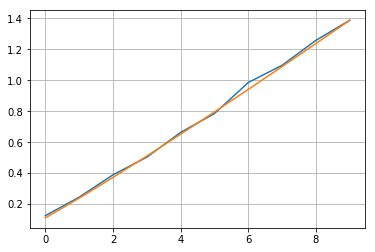

In [60]:
plt.plot(s)
plt.plot(s1)
plt.grid()
plt.show()

Ça colle, enfin à peu près. Et je décrète que c'est la fin :-).